# Multiple Linear Regression

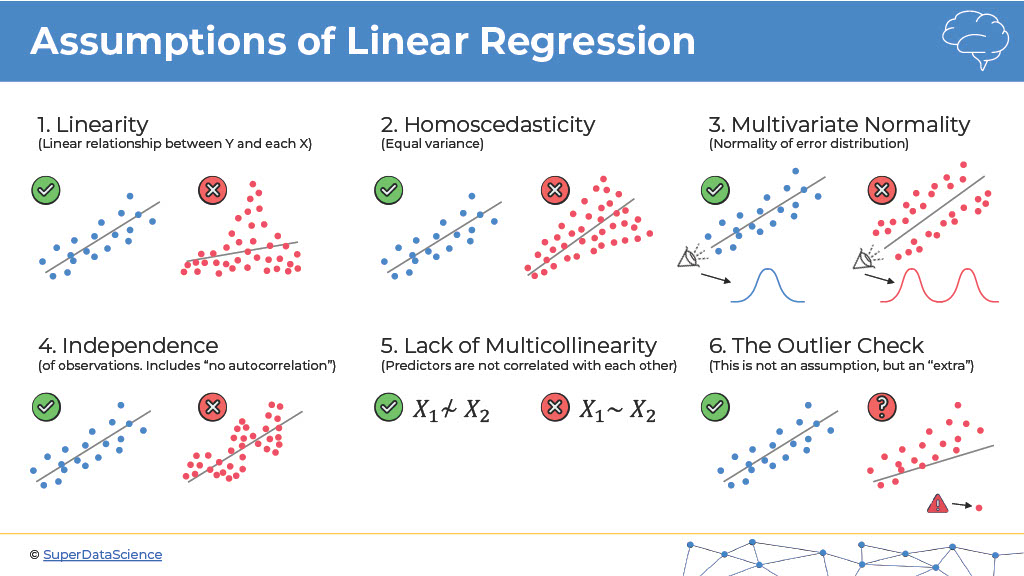

$$
y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n
$$

In this multiple linear regression equation, if we encounter with a categorical variable, we usually tranform it into the dummy variable(by using the one hot encoding) and put it as a variable $X_i$ in the equation.
<br>**Important notes:** **we always omit one dummy variable because of dummy variable trap.** (e.g. if there are 3 categories, then only two dummy variables to be included.)

**Dummy variable trap:** if all the dummy variables are included and because they are highly correlated(multi-collinear), there is an issue to interpret predicted coefficient variables in regression models which means that effect of one dummy variable is hardly to be distingished from another dummy variable.


## Buidling A Model
1.   All-in
2.   Backward Elimination
3.   Forward Elimnation
4.   Bidirectional Elimnation or Stepwise Regression
5.   Score Comparison

**All-in - cases:**<br>
*   Prior knowledge; OR
*   You have to; OR
*   Preparing for Backward Elimination










**Backward Elimination:**<br>
1.   Select a significance level to stay in the model (e.g. SL = 0.05)
2.   Fit the full model with **all possible predictors**
3.   Consider the predictor with the **highest P-value**. **If P > SL, go to 4, otherwise go to FIN**
4.   Remove the predictor
5.   Fit model without this variable<br>
**FIN: Your Model is Ready.**

**Forward Selection:**<br>
1.   Select a significance level to enter the model (e.g. SL = 0.05)
2.   Fit **all single regression models** $y$ ~ $x_n$. Select the one with the lowest P-value
3.   Keep this variable and fit all possible models with one extra predictor added to the one you already have
4.   Consider the predictor with the **lowest P-value**. **If P < SL, go to 3, otherwise go to FIN**<br>
**FIN: Keep the previous model.**

**Bidiectional Elimination:**<br>
1.   Select a significance level to enter and to stay in the model (e.g. SLENTER = 0.05m SLSTAY = 0.05)
2.   Perform the next step of **Forward Selection** (new variables must have: P < SLENTER to enter)
3.   Perform ALL steps of **Backward Elimination** (old variables must have P < SLSTAY to stay)
4.   No new variables can enter and no old variables can exist<br>
**FIN: Your Model is Ready.**

**All Possible Models:**<br>
1.   Select a criterion of goodness of fit (e.g. Akaike cirterion)
2.   Construct All Possible Regressiono Models: $2^N - 1$ total combinations
3.   Select the one with the best criterion<br>
**FIN: Your Model is Ready.**

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Encoding categorical data

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

**No need to do feature scaling on multiple linear regression since the coefficients will compensate that.**

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [10]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


## Getting the final linear regression equation with the values of the coefficients

In [11]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853278


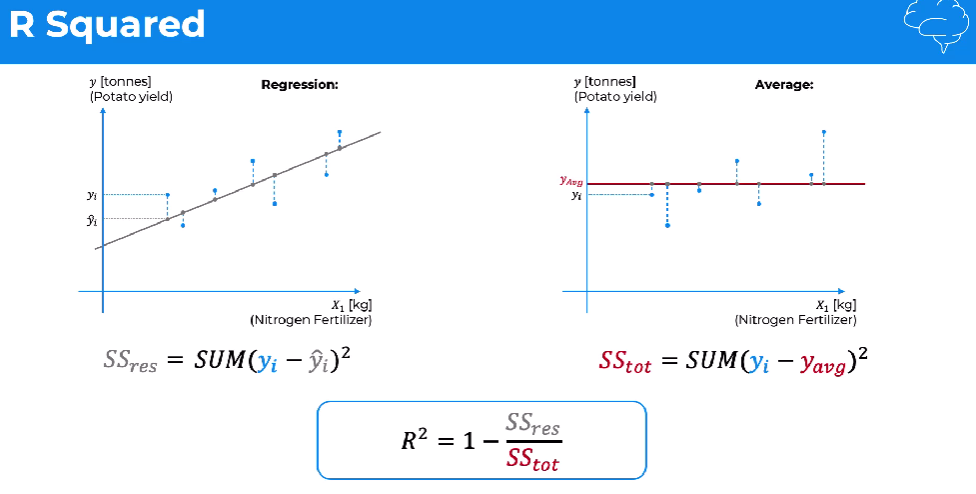

***R Squared used to evaluate the performane of the model. With larger R Squared value, better the performance.***

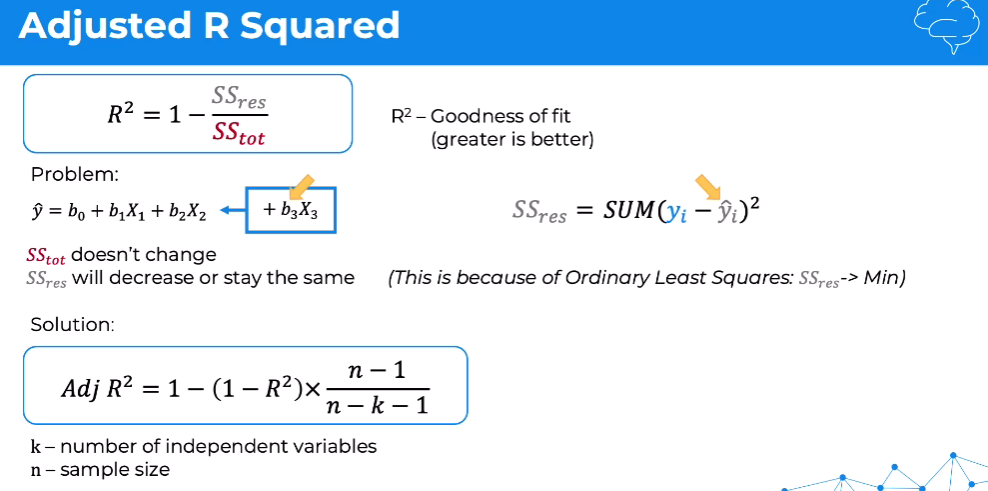

Adding new variables, it will change $SS_{res}$ **by either decreasing or staying the same** since the model will try to minimize $SS_{res}$ and when adding the new variable, it will look for possible minimizatoin of this value from the previous one; **if no such coefficient found, then it will put 0 as the coefficient for the new variable**, which means that this new adding variable would not play a role in affecting the y value; hence, by using adjusted R Squared, **it will penalize this situation by decreasing the value which means that only if the new variable would lead an increase in R Squared, this increase can compensate that decrease in adjusted formula.**

## Evaluating the Model Performance

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9347068473282546